## Business Understanding

Make a prediction for how long the customer will be a member


## Data Understanding
---

* Email
* Address
* Avatar
* Time on App
* Time on Website
* Length of Membership
* Yearly Amount Spent

### Download dataset

In [42]:
!pip install -q kaggle

In [43]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [44]:
!cp kaggle.json ~/.kaggle

In [45]:
!chmod 600 ~/.kaggle/kaggle.json

In [46]:
!kaggle datasets download -d iabdulw/ecommerce-customer-data 

ecommerce-customer-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Preparation

In [96]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score  


In [97]:
# load dataset

df = pd.read_csv('/content/ecommerce-customer-data.zip')

### Fix Data Structure

In [98]:
# head a data

df.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [99]:
# change columns name

df = df.rename(columns = {"\tEmail": "Email"})
df.columns

Index(['Email', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [100]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [101]:
# data describe

df.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


### Handle missing value

In [102]:
# Check missing value

df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### Data distribution

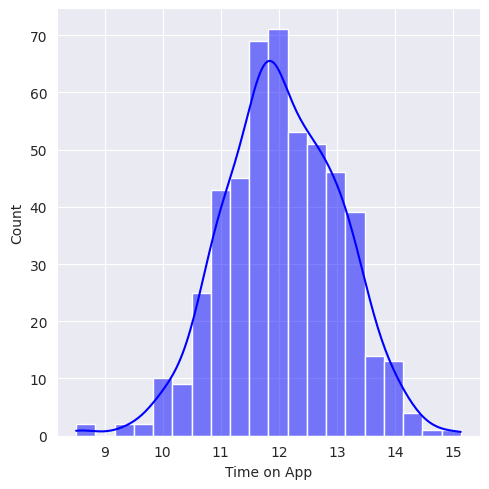

In [103]:
# time on app

sns.displot(df["Time on App"], kde= True, color="Blue")

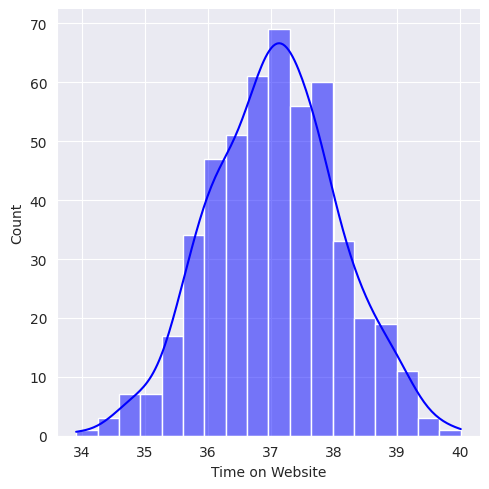

In [104]:
# time on website

sns.displot(df["Time on Website"], kde=True, color="Blue")

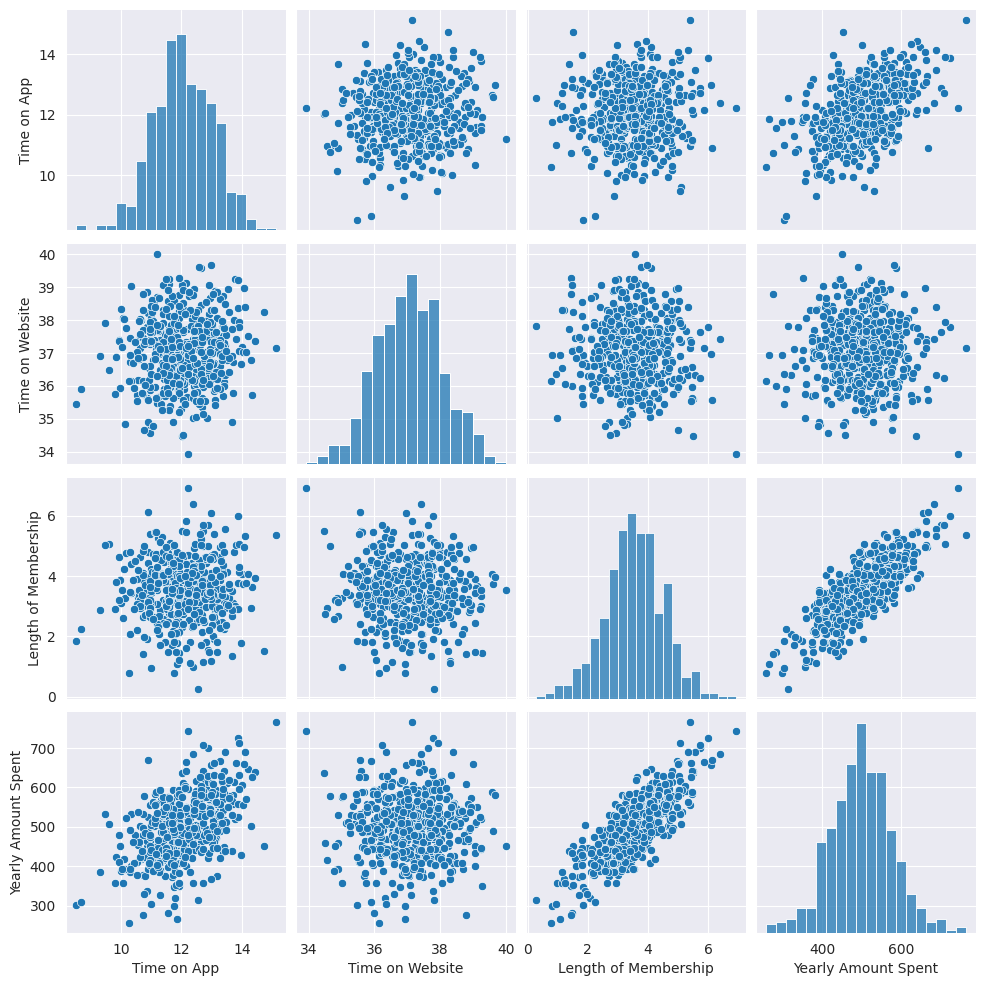

In [105]:
sns.pairplot(df)

<ipython-input-106-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

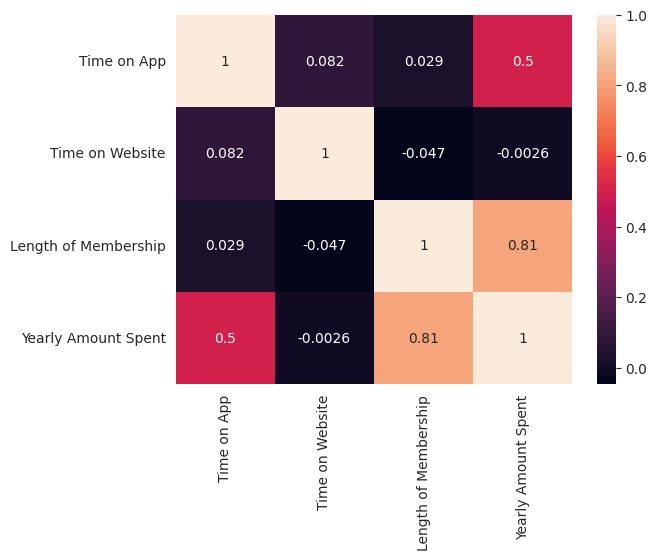

In [106]:
sns.heatmap(df.corr(), annot=True)

### Feature Scaling

In [107]:
# create scaler

scaler = StandardScaler()

In [108]:
X = df[['Time on App', 'Time on Website', 'Yearly Amount Spent']]
y = df['Length of Membership']

In [109]:
# fit and transform data

X = scaler.fit_transform(X)

In [110]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modeling

In [112]:
model = LinearRegression()

In [113]:
model.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [114]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [115]:
print("R-Squared : ", r2)

R-Squared :  0.8128174759667687


In [116]:
pd.DataFrame(predict)

,0
0,2.650607
1,3.179767
2,2.141305
3,3.867303
4,3.899998
...,...
145,4.520769
146,3.623956
147,3.555494
148,2.765280
